In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.stats import unitary_group
#from sympy.physics.matrices import msigma
#from sympy.physics.quantum import TensorProduct
from numpy import linalg as LA
from numpy.linalg import eig
from sympy import Matrix
from sympy.physics.quantum.dagger import Dagger
import scienceplots
plt.style.use(['science','notebook','grid'])
#----------------
set_ro_d = [] 
set_state = []
set_state_dager = []
density_matrix = []
sig_prdct = []
Entangled_state = []
Separable_state = []
good_ro_purity = []
bad_ro = []
Expectation_sum = []
Expectation_sum_notBell = []
Expectation_sum_Bell = []
purity = []
#----------------
d = 4
num_state = 10
num_denmet = 100000
min_rand = 0
max_rand = 10
I = 1j
#-----------------
sigma_x = np.array([[0,1],
                    [1,0]])
sigma_y = np.array([[0,-I],
                    [I,0]])
sigma_z = np.array([[1,0],
                    [0,-1]])

sigma = [sigma_x ,sigma_y ,sigma_z]
#-----------------
for i in range(0,3):
    for j in range(0,3):
        tt = np.kron(sigma[i],sigma[j])
        sig_prdct.append(tt)        
        
        
for i in range(num_denmet):
    def generate_diagonal_elements(d):
    # Generate n random numbers following Dirichlet distribution
        random_numbers = np.random.dirichlet(np.ones(d))
        return random_numbers

    diagonals = generate_diagonal_elements(d)

    set_ro_d.append(diagonals*np.identity(d))

    #puty = np.trace(set_ro_d[i]@set_ro_d[i])
    #purity.append(puty)    
    
for i in range(num_state):
    def random_unitary(d):
        # Generate a random complex matrix
        X = np.random.randn(d, d) + I * np.random.randn(d, d)
    
        # QR decomposition  
        Q, R = np.linalg.qr(X)
    
        # Create a diagonal matrix with phase factors
        D = np.diag(np.diag(R) / np.abs(np.diag(R)))
    
        # Construct the unitary matrix
        U = np.dot(Q, D)
    
        return U
 
    set_state.append(random_unitary(d))
    #set_state_dager.append(Dagger(set_state))

for q in range(num_denmet):
    for j in range(num_state):
        
        TT =[]
        ro = set_state[j]@set_ro_d[q]@Dagger(set_state[j])
        density_matrix.append(ro)
        puty = np.trace(density_matrix[q]@density_matrix[q].conj().T)
        purity.append(abs(puty))
        for i in range(len(sig_prdct)):
            t = np.trace(density_matrix[q]@sig_prdct[i])
            TT.append(t)
        T = np.array([[TT[0],TT[1],TT[2]],
          [TT[3],TT[4],TT[5]],
          [TT[6],TT[7],TT[8]]])

        eigval , eigvec = np.linalg.eig(Dagger(T)@T) 
        eeg = abs(eigval)
        g = np.trace(np.diag(eeg))-min(eeg)
        #ss = np.sort(abs(eigval))
        #g = ss[1] + ss[2]
        
        max_Exp = 2 * np.sqrt(g)
        Expectation_sum.append(max_Exp)
        if max_Exp > 2:
            Entangled_state.append(set_state[j])
            purity_ents = np.trace(abs(density_matrix[q]@density_matrix[q].conj().T))
            good_ro_purity.append(purity_ents)
            Expectation_sum_notBell.append(g)
            
        else:
            Separable_state.append(set_state[j])
            Expectation_sum_Bell.append(g)
            
print("Bell's inequality as witness suggest that we have" , len(Entangled_state) , "Entangled state")            

Bell's inequality as witness suggest that we have 12070 Entangled state


In [12]:
pty = []
for i in range(num_denmet*num_state):
    
    purity_u = np.trace(abs(density_matrix[i]@density_matrix[i].conj().T))
    pty.append(purity_u)

In [25]:
len(pty)


1000000

In [13]:
Possib_stat1 = []
for i in range(len(purity)):
    if purity[i]>0.333333333:
        Possib_stat1.append(purity[i])

In [45]:
Possib_stat = []
for i in range(len(pty)):
    if pty[i]>0.333333333:
        Possib_stat.append(pty[i])

In [4]:
len(Possib_stat1)

689300

In [14]:
percent = (len(Entangled_state)*100)/(len(Possib_stat1))
print(percent,"%" " of the generated random states are Entangled state as far as Bell's inequality can tell")

1.7242857142857142 % of the generated random states are Entangled state as far as Bell's inequality can tell


In [49]:
percent = (len(Entangled_state)*100)/(len(Possib_stat))
print(percent,"%" " of the generated random states are Entangled state as far as Bell's inequality can tell")

1.3699610627576728 % of the generated random states are Entangled state as far as Bell's inequality can tell


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [16]:
mpl.rcParams['text.latex.preamble'] = r'\boldmath'

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['xtick.direction'] = 'inout'

mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['ytick.direction'] = 'inout'

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.labelweight'] = 'bold'

mpl.rcParams['figure.titlesize'] = 14



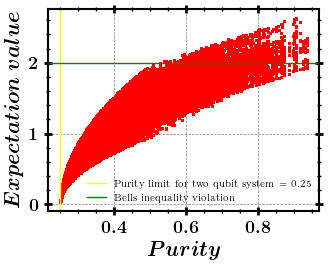

In [18]:
fig, ax = plt.subplots()

ax.plot(purity ,Expectation_sum,'o', color='red' , ms=1)
ax.set_ylabel(r'$Expectation$ $value$')
ax.set_xlabel(r'$Purity$')
#ax.set_ylim(0.01, 0.09)
#ax.set_xlim(-0.05e6, 3e6)
ax.axvline(0.25, color = 'yellow',label='Purity limit for two qubit system = 0.25')
ax.axhline(2, color = 'green',label='Bells inequality violation')
plt.legend(loc='lower right' , fontsize=7)


#fig.suptitle(r'A4')
plt.savefig('Bell_ineq.png', dpi=400)
plt.show()

In [19]:
#  calculating partial trace 
density_A = []
density_B = []
for i in range(len(density_matrix)):
    BB = np.split(density_matrix[i], 2, axis=1)
    BB0 = np.split(BB[0] , 2, axis=0)
    BB1 = np.split(BB[1] , 2, axis=0)
    B00 = BB0[0]
    B01 = BB1[0]
    B10 = BB0[1]
    B11 = BB1[1]
    P_Tr_B = np.array([[np.trace(B00),np.trace(B01)],
                   [np.trace(B10),np.trace(B11)]])
    density_A.append(P_Tr_B)
    P_Tr_A = np.array([[B00[0][0]+B11[0][0],B00[0][1]+B11[0][1]],
                   [B00[1][0]+B11[1][0],B00[1][1]+B11[1][1]]])
    density_B.append(P_Tr_A)




In [20]:
#calculating of Von Neumann entropy
import math
Entropy_A = []
Entropy_AB =[]
for i in range(len(density_A)):
    eigval , eigvec = np.linalg.eig(density_A[i])
    eg = abs(eigval)
    s = -(eg[0]*(math.log(eg[0])) + eg[1]*(math.log(eg[1])))
    Entropy_A.append(s)

for i in range(len(density_matrix)):
    eigval , eigvec = np.linalg.eig(density_matrix[i])
    eg = abs(eigval)
    s = -( eg[0]*(math.log(eg[0])) + eg[1]*(math.log(eg[1])) + eg[2]*(math.log(eg[2])) + eg[3]*(math.log(eg[3])))
    Entropy_AB.append(s)

In [21]:
# calculating entropy witness
separables_S = []
entangleds_S = []
for i in range(len(Entropy_AB)):
    if Entropy_AB[i]>=Entropy_A[i]:
        separables_S.append(density_matrix[i])
    else:
        entangleds_S.append(density_matrix[i])
        
print("Entropy as witness suggest that we have" , len(entangleds_S) , "Entangled state")  

Entropy as witness suggest that we have 8456 Entangled state


In [22]:
percent = (len(entangleds_S)*100)/(num_denmet*num_state)
print(percent,"%" " of the generated random states are Entangled state as far as Entropy as witness can tell")

0.8456 % of the generated random states are Entangled state as far as Entropy as witness can tell


In [23]:
#calculating of linear entropy
L_entropy = []
for i in range(len(density_matrix)):
    linear = (4/3)*(1-pty[i])
    L_entropy.append(linear)

In [24]:
mpl.rcParams['text.latex.preamble'] = r'\boldmath'

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['xtick.direction'] = 'inout'

mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['ytick.direction'] = 'inout'

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['axes.labelweight'] = 'bold'

mpl.rcParams['figure.titlesize'] = 14

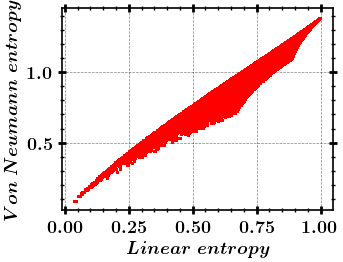

In [25]:
fig, ax = plt.subplots()

ax.plot(L_entropy ,Entropy_AB,'o', color='red' , ms=1)
ax.set_ylabel(r'$Von$ $Neumann$ $entropy$')
ax.set_xlabel(r'$Linear$ $entropy$')
#ax.set_ylim(0.01, 0.09)
#ax.set_xlim(-0.05e6, 3e6)
#ax.axvline(0.25, color = 'yellow',label='Purity limit for two qubit system = 0.25')
#ax.axhline(2, color = 'green',label='Bells inequality violation')
#plt.legend(loc='lower right' , fontsize=7)


#fig.suptitle(r'A4')
plt.savefig('LE_VNE.png', dpi=300)
plt.show()

In [8]:
#calculating the purity of Alice density matrix
purity_Alice = []
for i in range(len(density_A)): 
               purity_A = np.trace(abs(density_A[i]@density_A[i].conj().T))
               purity_Alice.append(purity_A)

In [9]:
#calculating the purity of Bob density matrix
purity_Bob = []
for i in range(len(density_B)): 
               purity_B = np.trace(abs(density_B[i]@density_B[i].conj().T))
               purity_Bob.append(purity_B)

In [ ]:
BB = np.split(density_matrix[0], 2, axis=1)
BB0 = np.split(BB[0] , 2, axis=0)
BB1 = np.split(BB[1] , 2, axis=0)
B00 = BB0[0]
B01 = BB1[0]
B10 = BB0[1]
B11 = BB1[1]
h1A = np.concatenate((B00,B10), axis=1)
h2A = np.concatenate((B01,B11), axis=1)
den_TA = np.concatenate((h1A,h2A), axis=0)
h1B = np.concatenate((B00.T,B01.T), axis=1)
h2B = np.concatenate((B10.T,B11.T), axis=1)
den_TB = np.concatenate((h1B,h2B), axis=0)

In [26]:
density_matrix_T_A = []
density_matrix_T_B = []
for i in range(len(density_matrix)):
    BB = np.split(density_matrix[i], 2, axis=1)
    BB0 = np.split(BB[0] , 2, axis=0)
    BB1 = np.split(BB[1] , 2, axis=0)
    B00 = BB0[0]
    B01 = BB1[0]
    B10 = BB0[1]
    B11 = BB1[1]
    h1A = np.concatenate((B00,B10), axis=1)
    h2A = np.concatenate((B01,B11), axis=1)
    partial_A = np.concatenate((h1A,h2A), axis=0)
    density_matrix_T_A.append(partial_A)
    h1B = np.concatenate((B00.T,B01.T), axis=1)
    h2B = np.concatenate((B10.T,B11.T), axis=1)
    partial_B = np.concatenate((h1B,h2B), axis=0)
    density_matrix_T_B.append(partial_B)

In [27]:
#calculating the Negativity
Negativity = []
for i in range(len(density_matrix_T_B)):
    eigval , eigvec = np.linalg.eig(density_matrix_T_B[i])
    negs = [] 
    for j in range(len(eigval)):   
        N = eigval[j].real
        if N<0:
            negs.append(N)
    N_sum = sum(negs)
    N_ro = 2*max(0,abs(N_sum))
    Negativity.append(N_ro)

In [28]:
non = np.count_nonzero(Negativity)


In [29]:
percent = (non*100)/(num_denmet*num_state)
print(percent,"%" " of the generated random states are Entangled state as far as Negativity as witness can tell")

35.9607 % of the generated random states are Entangled state as far as Negativity as witness can tell


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


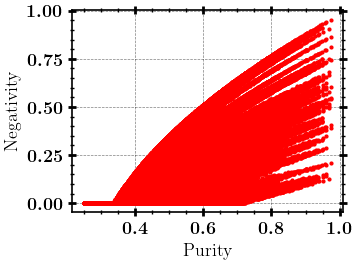

In [30]:
plt.plot(pty , Negativity , 'o' , color='red' , ms=2)
#plt.axvline(0.25, color = 'blue',label='Purity limit for two qubit system = 0.25')
#plt.axhline(2, color = 'black',label='Bells inequality violation')

plt.ylabel('Negativity')
plt.xlabel('Purity')
plt.legend(loc='upper right' , fontsize=10)
plt.savefig('Neg_Purity.png', dpi=300)
plt.show()

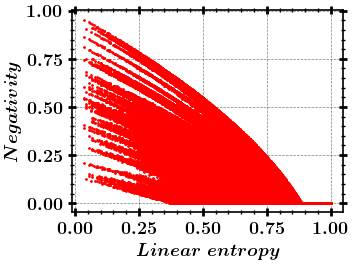

In [31]:
fig, ax = plt.subplots(1, 1)

ax.plot(L_entropy ,Negativity,'o', color='red' , ms=1)
ax.set_ylabel(r'$Negativity$')
ax.set_xlabel(r'$Linear$ $entropy$')
#ax.set_ylim(0.01, 0.09)
#ax.set_xlim(-0.05e6, 3e6)
#ax.axvline(0.25, color = 'yellow',label='Purity limit for two qubit system = 0.25')
#ax.axhline(2, color = 'green',label='Bells inequality violation')
#plt.legend(loc='lower right' , fontsize=7)


#fig.suptitle(r'A4')
plt.savefig('Neg_LE.png', dpi=300)
plt.show()

In [ ]:
#concurrence

In [33]:
concurrence = []
for i in range(len(density_matrix)):
    ro_tilda = np.kron(sigma_y,sigma_y)@np.conj(density_matrix[i])@np.kron(sigma_y,sigma_y)
    R = density_matrix[i]@ro_tilda

    eigval , eigvec = np.linalg.eig(R)
    sort_eig = np.sqrt(np.sort(eigval))
    landa = sort_eig[3]-sort_eig[2]-sort_eig[1]-sort_eig[0]
    c = max(0,landa)
    concurrence.append(abs(c))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


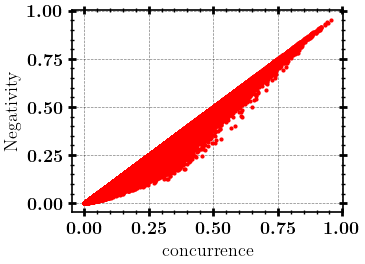

In [34]:
plt.plot(concurrence , Negativity , 'o' , color='red' , ms=2)


plt.ylabel('Negativity')
plt.xlabel('concurrence')
plt.legend(loc='upper right' , fontsize=10)
plt.savefig('Neg_Con.png', dpi=300)
plt.show()

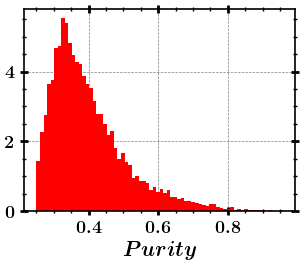

In [13]:
plt.hist(purity , bins=70 , color='red' ,density=True)
plt.xlabel(r'$Purity$')
plt.show()